In [19]:
# Importing the neccessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
# Loading the Dataset

train_df = pd.read_csv('Dataset/train.csv')
test_df = pd.read_csv('Dataset/train.csv')

In [21]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [22]:
test_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [23]:
import nltk
from nltk.corpus import stopwords
# Step 2: Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chizz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chizz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chizz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chizz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chizz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# Initialize Stemmer and Lemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [25]:
# Step 3: Define text cleaning functions
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()
    return text

In [26]:
# Apply Stemming, Lemmatization, Stopword Removal
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = clean_text(text)
    words = word_tokenize(text)
    # Apply Lemmatization and Stemming
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]
    return ' '.join(words)

In [27]:
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

In [28]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv u,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1
7609,10870,NaN,NaN,control wild fire california even northern par...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,polic investig ebik collid car littl portug eb...,1


In [29]:
test_df

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv u,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1
7609,10870,NaN,NaN,control wild fire california even northern par...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,polic investig ebik collid car littl portug eb...,1


In [30]:
# Step 4: N-grams (Unigrams, Bigrams, Trigrams)
from nltk.util import ngrams

def extract_ngrams(text, n=2):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

In [31]:
# Example: Adding bigrams and trigrams as features
train_df['bigrams'] = train_df['text'].apply(lambda x: extract_ngrams(x, n=2))
train_df['trigrams'] = train_df['text'].apply(lambda x: extract_ngrams(x, n=3))

test_df['bigrams'] = test_df['text'].apply(lambda x: extract_ngrams(x, n=2))
test_df['trigrams'] = test_df['text'].apply(lambda x: extract_ngrams(x, n=3))

In [32]:
train_df

,id,keyword,location,text,target,bigrams,trigrams
0,1,NaN,NaN,deed reason earthquak may allah forgiv u,1,"[deed reason, reason earthquak, earthquak may,...","[deed reason earthquak, reason earthquak may, ..."
1,4,NaN,NaN,forest fire near la rong sask canada,1,"[forest fire, fire near, near la, la rong, ron...","[forest fire near, fire near la, near la rong,..."
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1,"[resid ask, ask shelter, shelter place, place ...","[resid ask shelter, ask shelter place, shelter..."
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1,"[peopl receiv, receiv wildfir, wildfir evacu, ...","[peopl receiv wildfir, receiv wildfir evacu, w..."
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,"[got sent, sent photo, photo rubi, rubi alaska...","[got sent photo, sent photo rubi, photo rubi a..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home,1,"[two giant, giant crane, crane hold, hold brid...","[two giant crane, giant crane hold, crane hold..."
7609,10870,NaN,NaN,control wild fire california even northern par...,1,"[control wild, wild fire, fire california, cal...","[control wild fire, wild fire california, fire..."
7610,10871,NaN,NaN,utckm volcano hawaii,1,"[utckm volcano, volcano hawaii]",[utckm volcano hawaii]
7611,10872,NaN,NaN,polic investig ebik collid car littl portug eb...,1,"[polic investig, investig ebik, ebik collid, c...","[polic investig ebik, investig ebik collid, eb..."


In [33]:
# Step 5: Data splitting

from sklearn.model_selection import train_test_split

X = train_df['text']
y = train_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X_train,X_test

(4996    courag honest analysi need use atom bomb hiros...
 3263    wld b shame golf cart becam engulf flame boyco...
 4907    tell rescind medal honor given u soldier massa...
 2855    worri ca drought might affect extrem weather d...
 4716               lava blast amp power red pantherattack
                               ...                        
 5226            arent mani obliter server alway like play
 5390    panic attack bc dont enough money drug alcohol...
 860     omron hemc automat blood pressur monitor stand...
 7603    offici say quarantin place alabama home possib...
 7270      move england five year ago today whirlwind time
 Name: text, Length: 6090, dtype: object,
 2644                    new weapon caus unimagin destruct
 2227    famp thing gishwh got soak delug go pad tampon...
 5448     dt rt col polic catch pickpocket liverpool stree
 132     aftershock back school kick great want thank e...
 6845    respons trauma child addict develop defens sel...
              

In [35]:
# Step 6: TF-IDF with N-grams
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 3))  # Using bigrams and trigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [36]:
# Step 7: Handle class imbalance using resampling
from sklearn.utils import resample

def balance_classes(df):
    df_majority = df[df['target'] == 1]
    df_minority = df[df['target'] == 0]
    df_minority_upsampled = resample(
        df_minority,
        replace=True,
        n_samples=len(df_majority),
        random_state=42
    )
    return pd.concat([df_majority, df_minority_upsampled])


df_upsampled = balance_classes(train_df)
X_upsampled = df_upsampled['text']
y_upsampled = df_upsampled['target']

In [37]:
X_upsampled

0                deed reason earthquak may allah forgiv u
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3             peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
344     offici vid thereal gtgtgt gtgtgt gtgtgt armage...
4571    u cant blame coach manag penalti defenc injuri...
7152      la startup hot flower come straight volcano via
278                  feel like pullup one stage apocalyps
5847    understand want hang guy friend ill give space...
Name: text, Length: 6542, dtype: object

In [38]:
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(
    X_upsampled, y_upsampled, test_size=0.2, random_state=42)
X_train_tfidf_upsampled = tfidf.fit_transform(X_train_upsampled)
X_test_tfidf_upsampled = tfidf.transform(X_test_upsampled)

In [39]:
# Step 8: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_tfidf_upsampled, y_train_upsampled)
y_pred_lr = model_lr.predict(X_test_tfidf_upsampled)
# Evaluate Logistic Regression
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_upsampled, y_pred_lr):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_upsampled, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test_upsampled, y_pred_lr)}")

Logistic Regression Model Evaluation:
Accuracy: 0.7922
Confusion Matrix:
[[531 105]
 [167 506]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       636
           1       0.83      0.75      0.79       673

    accuracy                           0.79      1309
   macro avg       0.79      0.79      0.79      1309
weighted avg       0.80      0.79      0.79      1309



In [40]:
from sklearn.svm import SVC

# Step 9: Support Vector Classifier (SVC)
model_svc = SVC(kernel='linear', random_state=42)
model_svc.fit(X_train_tfidf_upsampled, y_train_upsampled)
y_pred_svc = model_svc.predict(X_test_tfidf_upsampled)

# Evaluate SVC
print("Support Vector Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_upsampled, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_upsampled, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test_upsampled, y_pred_svc)}")

Support Vector Classifier Model Evaluation:
Accuracy: 0.7922
Confusion Matrix:
[[541  95]
 [177 496]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       636
           1       0.84      0.74      0.78       673

    accuracy                           0.79      1309
   macro avg       0.80      0.79      0.79      1309
weighted avg       0.80      0.79      0.79      1309



In [41]:
# Step 10: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_tfidf_upsampled, y_train_upsampled)
y_pred_rf = model_rf.predict(X_test_tfidf_upsampled)

# Evaluate Random Forest
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_upsampled, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_upsampled, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test_upsampled, y_pred_rf)}")

Random Forest Model Evaluation:
Accuracy: 0.8083
Confusion Matrix:
[[546  90]
 [161 512]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       636
           1       0.85      0.76      0.80       673

    accuracy                           0.81      1309
   macro avg       0.81      0.81      0.81      1309
weighted avg       0.81      0.81      0.81      1309



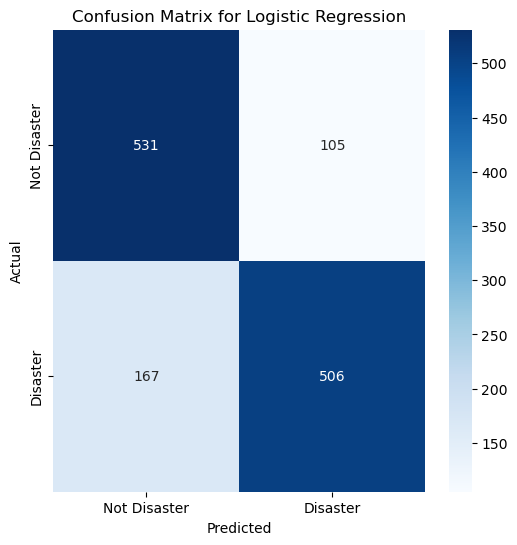

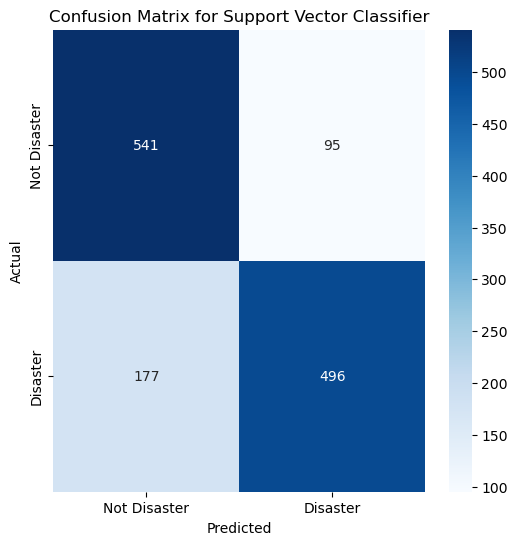

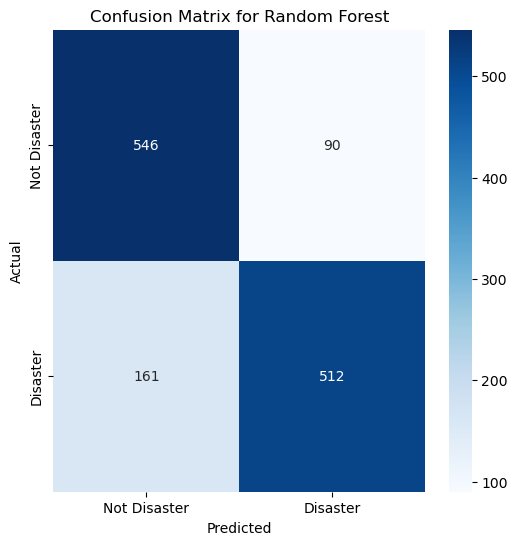

In [42]:
# Step 11: Plot Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    
from sklearn.metrics import confusion_matrix
# Plot for each model
plot_confusion_matrix(y_test_upsampled, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test_upsampled, y_pred_svc, "Support Vector Classifier")
plot_confusion_matrix(y_test_upsampled, y_pred_rf, "Random Forest")

In [46]:
# Step 12: Predict outcomes on test data using Random Forest Model
new_tweets = test_df['text']
X_test_tfidf_testing = tfidf.transform(new_tweets)
predictions = model_rf.predict(X_test_tfidf_testing)

# Display predictions
for tweet, pred in zip(new_tweets[:10], predictions[:10]):
    print(f"Tweet: {tweet}")
    print(f"Prediction: {'Real Disaster' if pred == 1 else 'Not Real Disaster'}")
    print("-" * 50)

Tweet: deed reason earthquak may allah forgiv u
Prediction: Real Disaster
--------------------------------------------------
Tweet: forest fire near la rong sask canada
Prediction: Real Disaster
--------------------------------------------------
Tweet: resid ask shelter place notifi offic evacu shelter place order expect
Prediction: Real Disaster
--------------------------------------------------
Tweet: peopl receiv wildfir evacu order california
Prediction: Real Disaster
--------------------------------------------------
Tweet: got sent photo rubi alaska smoke wildfir pour school
Prediction: Real Disaster
--------------------------------------------------
Tweet: rockyfir updat california hwi close direct due lake counti fire cafir wildfir
Prediction: Real Disaster
--------------------------------------------------
Tweet: flood disast heavi rain caus flash flood street manit colorado spring area
Prediction: Real Disaster
--------------------------------------------------
Tweet: im top 